In [3]:
from covid_simulation import * 
import pickle
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
from matplotlib.animation import FuncAnimation, PillowWriter  

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:

stateIdx=1
type_of_network, N  = (1,10000)
data_dir = 'data_' + str(type_of_network)+'_'+ str(N)
G=nx.read_gpickle(os.path.join(data_dir,'G_simulated_logState{}.p'.format(stateIdx)))


pos=nx.random_layout(G)
# #pos=nx.spring_layout(G)
node_list=[x for x in range(N)]

ind= '001'
tmp_png_dir = r'C:\temp\covid\png_'+ind
if not os.path.exists(tmp_png_dir): 
    os.mkdir(tmp_png_dir)

In [5]:
status_list=   {'S':{'node_color': 'blue','node_size' : 5, 'alpha': 0.5 }, 
                'E':{'node_color': 'orange','node_size' : 50, 'alpha': 1.0 },
                'I':{'node_color': 'red','node_size' : 50, 'alpha': 1.0 },
                'R':{'node_color': 'gray','node_size' : 50, 'alpha': 1.0 },
                'D':{'node_color': 'black','node_size' : 50, 'alpha': 1.0 }}

In [6]:
def split_into_age_groups(node_list): 

    result={1:[], 2:[], 3:[], 4:[]}

    for n in node_list: 
        age_group=find_age_group(G.nodes[n]['age'])    
        result[age_group].append(n)
    return result

In [7]:
age_group_node_shape_list = {1:'o',2:'^',3:'s',4:'X'}
# logStatus= pickle.load(open(os.path.join(data_dir,'G_logState1.p'), 'rb'))
# split_into_age_groups(logStatus[10]['E'])

# age_group_node_shape_list[1]
age_group_node_shape_list[3]

's'

In [8]:
def new_exposed_nodes(G, logStatus, t): 
    edges_list = []
    if t > 0 :  
        status = 'E'
        exposed_node_list=logStatus[t][status]

        addition_exposed_list= [x for x in logStatus[t][status] if 
                        (x not in logStatus[t-1][status]) & (find_age_group(G.nodes[x]['age']) == 4 )]
        addition_exposed_list = [x for x in addition_exposed_list if 'origin' in G.nodes[x]]
        edges_list=set([(G.nodes[x]['origin'][-1], x) for x in addition_exposed_list if G.nodes[x]['origin'][-1] > -1]) 
    return edges_list

In [9]:
def animate(G, logStatus, ax, t, st_list=['S','E','I','R','D'], age_group=False):
    if age_group: 
        for status in st_list: 
            split_node_list = split_into_age_groups(logStatus[t][status])
            for age_k, age_nodes in split_node_list.items(): 

                nx.draw_networkx_nodes(G,pos,
                                        nodelist=age_nodes,
                                        node_shape=age_group_node_shape_list[age_k],
                                        node_color=status_list[status]['node_color'],
                                        node_size=status_list[status]['node_size'],
                                        alpha=status_list[status]['alpha'] ,ax=ax)     
        nx.draw_networkx_edges(G, pos, edgelist=new_exposed_nodes(G,logStatus, t), edge_color='r', alpha = 0.5, ax=ax)

    
    
    else: 
        for k, status in enumerate(st_list): 
            nx.draw_networkx_nodes(G,pos,
                                    nodelist=logStatus[t][status],
                                    node_color=status_list[status]['node_color'],
                                    node_size=status_list[status]['node_size'],
                                    alpha=status_list[status]['alpha'] ,ax=ax)
        nx.draw_networkx_edges(G, pos, edgelist=new_exposed_nodes(G,logStatus, t), edge_color='r', ax=ax)
   

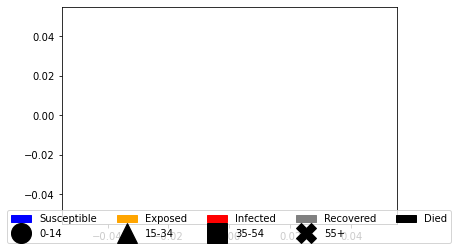

In [10]:
import matplotlib.patches as mpatches
flatten = lambda l: [item for sublist in l for item in sublist]
colors = ['blue', 'orange', 'red', 'gray', 'black']
texts1 = ['Susceptible','Exposed','Infected','Recovered', 'Died']
color_patches=[mpatches.Patch(color=x[0], label=x[1]) for x in zip(colors, texts1)]

markers = ['o','^','s','X', '']
texts2 = ['0-14', '15-34', '35-54', '55+' ,'']

patches1 = [ plt.plot([],[], marker=markers[i], ms=20, ls="", color='black', 
            label="{:s}".format(texts2[i]) )[0]  for i in range(len(texts2)) ]

plt.legend(handles=flatten(list(map(list, zip(color_patches,patches1)))), bbox_to_anchor=(0.5, -0.01), 
           loc='center', ncol = 5)


In [31]:
if False: 
    logStatus1 = pickle.load(open(os.path.join(data_dir,'G_logState1.p'), 'rb'))
    G1=nx.read_gpickle(os.path.join(data_dir,'G_simulated_logState{}.p'.format(1)))

    stat_list  = ['S', 'E','I','R','D']
    #stat_list = ['E','I','D']
    for t in tqdm(range(150)): 
        fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,10))
        animate(G1, logStatus1, ax, t,  stat_list, age_group=True)

        ax.set_title('State1', loc='left')

        fig.suptitle('t= {} days'.format(t), fontsize=15)
        plt.legend(handles=flatten(list(map(list, zip(color_patches,patches1)))), bbox_to_anchor=(0.5, 0), 
           loc='center', ncol = 5)

        plt.tight_layout(pad=2.0, w_pad=0.0, h_pad=0.0)
        plt.savefig(tmp_png_dir + r'\Graph_{:04d}.png'.format(t), format="PNG")
        fig.clear()

In [22]:
if True: 
    logStatus1 = pickle.load(open(os.path.join(data_dir,'G_logState1.p'), 'rb'))
    logStatus2 = pickle.load(open(os.path.join(data_dir,'G_logState2.p'), 'rb'))
    logStatus3 = pickle.load(open(os.path.join(data_dir,'G_logState3.p'), 'rb'))
    logStatus4 = pickle.load(open(os.path.join(data_dir,'G_logState4.p'), 'rb'))
    G1=nx.read_gpickle(os.path.join(data_dir,'G_simulated_logState{}.p'.format(1)))
    G2=nx.read_gpickle(os.path.join(data_dir,'G_simulated_logState{}.p'.format(2)))
    G3=nx.read_gpickle(os.path.join(data_dir,'G_simulated_logState{}.p'.format(3)))
    G4=nx.read_gpickle(os.path.join(data_dir,'G_simulated_logState{}.p'.format(4)))


    stat_list  = ['S', 'E','I','R','D']
    #stat_list = ['E','I','R', 'D']
    for t in range(150): 
        fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20,20),  sharex='all', sharey='all')
        animate(G1, logStatus1, ax[0,0], t,  stat_list, age_group=True)
        animate(G2, logStatus2, ax[0,1], t,  stat_list, age_group=True)
        animate(G3, logStatus3, ax[1,0], t,  stat_list, age_group=True)
        animate(G4, logStatus4, ax[1,1], t,  stat_list, age_group=True)
        ax[0,0].set_title('State1')
        ax[0,1].set_title('State2')
        ax[1,0].set_title('State3')
        ax[1,1].set_title('State4')
        fig.suptitle('t= {} days'.format(t), fontsize=15)

        plt.tight_layout(pad=2.0, w_pad=0.0, h_pad=0.0)
        fig.legend(handles=flatten(list(map(list, zip(color_patches,patches1)))), 
           bbox_to_anchor=(0.5, 0.02), loc='center', ncol = 5,  prop={'size': 20})
        plt.savefig(tmp_png_dir + r'\Graph_{:04d}.png'.format(t), format="PNG")
        fig.clear()

<Figure size 1440x1440 with 0 Axes>

In [11]:
import cv2
import os

image_folder = tmp_png_dir
video_name=os.path.join(data_dir, 'video_compare_{}.mp4'.format(ind))

images = [img for img in os.listdir(image_folder) if img.endswith(".png")]

frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

fourcc = cv2.VideoWriter_fourcc('m','p','4','v')
video = cv2.VideoWriter(video_name, fourcc, 5, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()